# 4. Perceptron Đa tầng
Trong chương này, chúng tôi sẽ giới thiệu mạng nơ-ron sâu thực sự đầu tiên của bạn. Mạng nơ-ron sâu đơn giản nhất được gọi là perceptron đa tầng. Nó gồm nhiều tầng nơ-ron, mỗi nơ-ron được kết nối đầy đủ với các nơ-ron khác ở tầng phía dưới (các nơ-ron cung cấp đầu vào) và tầng phía trên (các nơ-ron mà nó gây ảnh hưởng). Khi huấn luyện các mô hình có độ phức tạp cao, ta sẽ có nguy cơ gặp vấn đề quá khớp. Vì vậy, chúng tôi cần cung cấp cho bạn những hiểu biết ban đầu thật chặt chẽ với các khái niệm quá khớp, dưới khớp và kiểm soát độ phức tạp. Nhằm giúp bạn giải quyết những vấn đề kể trên, chúng tôi sẽ giới thiệu những kỹ thuật điều chuẩn như dropout và suy giảm trọng số. Ta cũng sẽ bàn đến các vấn đề liên quan tới sự ổn định số học và việc khởi tạo tham số, hai yếu tố chính giúp việc huấn luyện mạng nơ-ron sâu thành công. Xuyên suốt chương này, chúng tôi tập trung vào việc áp dụng các mô hình cho dữ liệu thực tế, nhằm giúp độc giả không chỉ nắm vững được các khái niệm mà còn có thể thực hành sử dụng mạng nơ-ron sâu. Những vấn đề liên quan tới hiệu năng tính toán, khả năng mở rộng và mức hiệu quả của mô hình sẽ được giới thiệu ở các chương sau.

## 4.1. Perceptron đa tầng
Bây giờ, sau khi đã thành thạo các cơ chế nêu trên trong ngữ cảnh của những mô hình tuyến tính đơn giản, chúng ta có thể bắt đầu khám phá trọng tâm của cuốn sách này: lớp mô hình phong phú của các mạng nơ-ron sâu.

### 4.1.1. Các tầng ẩn
Ví dụ, tính tuyến tính ngụ ý về giả định *yếu hơn* của *tính đơn điệu*: tức giá trị đặc trưng tăng luôn dẫn đến việc đầu ra mô hình tăng (nếu trọng số tương ứng dương), hoặc đầu ra mô hình giảm (nếu trọng số tương ứng âm). Điều này đôi khi cũng hợp lý. Ví dụ, nếu chúng ta đang dự đoán liệu một người có trả được khoản vay hay không, chúng ta có thể suy diễn một cách hợp lý như sau: bỏ qua mọi yếu tố khác, ứng viên nào có thu nhập cao hơn sẽ có khả năng trả được nợ cao hơn so với những ứng viên khác có thu nhập thấp hơn. Dù có tính đơn điệu, mối quan hệ này khả năng cao là không liên quan tuyến tính tới xác suất trả nợ. Khả năng trả được nợ thường sẽ có mức tăng lớn hơn khi thu nhập tăng từ $0 lên $50k so với khi tăng từ $1M lên $1.05M. Một cách để giải quyết điều này là tiền xử lý dữ liệu để tính tuyến tính trở nên hợp lý hơn, ví dụ như sử dụng logarit của thu nhập để làm đặc trưng.

Nhưng còn với bài toán phân loại hình ảnh chó mèo thì sao? Liệu việc tăng cường độ sáng của điểm ảnh tại vị trí (13, 17) sẽ luôn tăng (hoặc giảm) khả năng đó là hình một con chó? Sử dụng mô hình tuyến tính trong trường hợp này tương ứng với việc ngầm giả định rằng chỉ cần đánh giá độ sáng của từng pixel để phân biệt giữa mèo và chó . Cách tiếp cận này chắc chắn sẽ không chính xác khi các hình ảnh bị đảo ngược màu sắc.

Tuy nhiên, ta bỏ qua sự phi lý của tuyến tính ở đây, so với các ví dụ trước, rõ ràng là ta không thể giải quyết bài toán này với vài bước tiền xử lý chỉnh sửa đơn giản. Bởi vì ý nghĩa của các điểm ảnh phụ thuộc một cách phức tạp vào bối cảnh xung quanh nó (các giá trị xung quanh của điểm ảnh). Có thể vẫn tồn tại một cách biểu diễn dữ liệu nào đó nắm bắt được sự tương tác giữa các đặc trưng liên quan (và quan trọng nhất là phù hợp với mô hình tuyến tính), ta đơn giản là không biết làm thế nào để tính toán nó một cách thủ công. Với các mạng nơ-ron sâu, ta sử dụng dữ liệu đã quan sát được để đồng thời học cách biểu diễn (thông qua các tầng ẩn) và học một bộ dự đoán tuyến tính hoạt động dựa trên biểu diễn đó.

#### 4.1.1.1. Kết hợp các Tầng ẩn
Ta có thể vượt qua những hạn chế của mô hình tuyến tính và làm việc với một lớp hàm tổng quát hơn bằng cách thêm vào một hoặc nhiều tầng ẩn. Cách dễ nhất để làm điều này là xếp chồng nhiều tầng kết nối đầy đủ lên nhau. Giá trị đầu ra của mỗi tầng được đưa làm giá trị đầu vào cho tầng bên trên, cho đến khi ta tạo được một đầu ra. Ta có thể xem  $L−1$  tầng đầu tiên như các tầng học biểu diễn dữ liệu và tầng cuối cùng là bộ dự đoán tuyến tính. Kiến trúc này thường được gọi là *perceptron đa tầng (multilayer percention)*, hay được viết tắt là MLP

![](images/mlp.svg)

Perceptron đa tầng này có 4 đầu vào, 3 đầu ra và tầng ẩn của nó chứa 5 nút ẩn. Vì tầng đầu vào không cần bất kỳ tính toán nào, do đó đối với mạng này để tạo đầu ra đòi hỏi phải lập trình các phép tính cho hai tầng còn lại (tầng ẩn và tầng đầu ra). Lưu ý, tất cả tầng này đều kết nối đầy đủ. Mỗi đầu vào đều ảnh hưởng đến mọi nơ-ron trong tầng ẩn và mỗi nơ-ron này lại ảnh hưởng đến mọi nơ-ron trong tầng đầu ra.

#### 4.1.1.2. Từ Tuyến tính đến Phi tuyến
Về mặt hình thức, chúng ta tính toán mỗi tầng trong MLP một-tầng-ẩn này như sau:

\begin{split}\begin{aligned}
    \mathbf{h} & = \mathbf{W}_1 \mathbf{x} + \mathbf{b}_1, \\
    \mathbf{o} & = \mathbf{W}_2 \mathbf{h} + \mathbf{b}_2, \\
\end{aligned}\end{split}

Chú ý rằng sau khi thêm tầng này vào, mô hình lập tức yêu cầu chúng ta phải theo dõi và cập nhật thêm hai tập tham số. Vậy thì đổi lại ta sẽ nhận được gì? Bạn có thể bất ngờ khi phát hiện ra rằng—trong mô hình định nghĩa bên trên—chúng ta chẳng thu được lợi ích gì từ những rắc rối thêm vào! Lý do rất đơn giản. Các nút ẩn bên trên được định nghĩa bởi một hàm tuyến tính của các đầu vào, và các đầu ra (tiền Softmax) chỉ là một hàm tuyến tính của các nút ẩn. Một hàm tuyến tính của một hàm tuyến tính bản thân nó cũng chính là một hàm tuyến tính. Hơn nữa, mô hình tuyến tính của chúng ta vốn dĩ đã có khả năng biểu diễn bất kỳ hàm tuyến tính nào rồi.

Ta có thể thấy sự tương đồng về mặt hình thức bằng cách chứng minh rằng với mọi giá trị của các trọng số, ta đều có thể loại bỏ tầng ẩn và tạo ra một mô hình đơn-tầng với các tham số.

$\mathbf{W} = \mathbf{W}_2 \mathbf{W}_1$ và $\mathbf{b} = \mathbf{W}_2 \mathbf{b}_1 + \mathbf{b}_2$

$\mathbf{o} = \mathbf{W}_2 \mathbf{h} + \mathbf{b}_2 = \mathbf{W}_2 (\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1) + \mathbf{b}_2 = (\mathbf{W}_2 \mathbf{W}_1) \mathbf{x} + (\mathbf{W}_2 \mathbf{b}_1 + \mathbf{b}_2) = \mathbf{W} \mathbf{x} + \mathbf{b}.$

Để hiện thực được tiềm năng của các kiến trúc đa tầng, chúng ta cần một thành phần quan trọng nữa—một *hàm kích hoạt phi tuyến* theo từng phần tử  $σ$  để áp dụng lên từng nút ẩn (theo sau phép biến đổi tuyến tính). Hiện nay, lựa chọn phổ biến nhất cho tính phi tuyến là đơn vị tuyến tính chỉnh lưu (ReLU)  $max(x,0)$. Nhìn chung, với việc sử dụng các hàm kích hoạt này, chúng ta sẽ không thể biến MLP thành một mô hình tuyến tính được nữa.

\begin{split}\begin{aligned}
    \mathbf{h} & = \sigma(\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1), \\
    \mathbf{o} & = \mathbf{W}_2 \mathbf{h} + \mathbf{b}_2, \\
\end{aligned}\end{split}

Để xây dựng các MLP tổng quan hơn, chúng ta có thể tiếp tục chồng thêm các tầng ẩn, ví dụ,  $h_1=σ(W_1x+b_1)$  và  $h_2=σ(W_2h_1+b_2)$ , kế tiếp nhau, tạo ra các mô hình có khả năng biểu diễn càng cao (giả sử chiều rộng cố định).

Các MLP có thể biểu diễn được những tương tác phức tạp giữa các đầu vào thông qua các nơ-ron ẩn, các nơ-ron ẩn này phụ thuộc vào giá trị của mỗi đầu vào. Chúng ta có thể dễ dàng thiết kế các nút ẩn để thực hiện bất kỳ tính toán nào, ví dụ, các phép tính logic cơ bản trên một cặp đầu vào. Ngoài ra, với một số hàm kích hoạt cụ thể, các MLP được biết đến rộng rãi như là các bộ xấp xỉ vạn năng. Thậm chí với một mạng chỉ có một tầng ẩn, nếu có đủ số nút (có thể nhiều một cách vô lý) và một tập các trọng số thích hợp, chúng ta có thể mô phỏng bất kỳ một hàm nào. *Thật ra thì việc học được hàm đó mới là phần khó khăn*. Bạn có thể tưởng tượng mạng nơ-ron của mình có nét giống với ngôn ngữ lập trình C. Ngôn ngữ này giống như bất kỳ ngôn ngữ hiện đại nào khác, có khả năng biểu diễn bất kỳ chương trình tính toán nào. Tuy nhiên việc tạo ra một chương trình đáp ứng được các các chỉ tiêu kỹ thuật mới là phần việc khó khăn.

#### 4.1.1.3. Vector hoá và Minibatch
Thông thường, như trong mục này, các hàm kích hoạt không chỉ đơn thuần được áp dụng vào tầng ẩn theo từng hàng mà còn theo từng phần tử. Điều đó có nghĩa là sau khi tính toán xong phần tuyến tính của tầng, chúng ta có thể tính giá trị kích hoạt của từng nút mà không cần đến giá trị của các nút còn lại. Điều này cũng đúng đối với hầu hết các hàm kích hoạt (toán tử chuẩn hoá theo batch được giới thiệu trong Section 7.5 là một trường hợp ngoại lệ của quy tắc này).

### 4.1.2. Các hàm Kích hoạt
Các hàm kích hoạt quyết định một nơ-ron có được kích hoạt hay không bằng cách tính tổng có trọng số và cộng thêm hệ số điều chỉnh vào nó. Chúng là các toán tử khả vi và hầu hết đều biến đổi các tín hiệu đầu vào thành các tín hiệu đầu ra theo một cách phi tuyến tính. Bởi vì các hàm kích hoạt rất quan trọng trong học sâu, hãy cùng tìm hiểu sơ lược một số hàm kích hoạt thông dụng.

In [1]:
%matplotlib inline
from d2l import torch as d2l
import torch

#### 4.1.2.1. Hàm ReLU
Như đã đề cập trước đó, đơn vị tuyến tính chỉnh lưu (ReLU) là sự lựa chọn phổ biến nhất do tính đơn giản khi lập trình và hiệu quả trong nhiều tác vụ dự đoán. ReLU là một phép biến đổi phi tuyến đơn giản. Cho trước một phần tử  $z$ , ta định nghĩa hàm ReLU là giá trị lớn nhất giữa chính phần tử đó và 0.

<center>$\mathrm{ReLU}(z) = \max(z, 0).$</center>

Nói một cách dễ hiểu hơn, hàm ReLU chỉ giữ lại các phần tử có giá trị dương và loại bỏ tất cả các phần tử có giá trị âm (đặt kích hoạt tương ứng là 0). Để có một cái nhìn khái quát, ta có thể vẽ đồ thị hàm số.

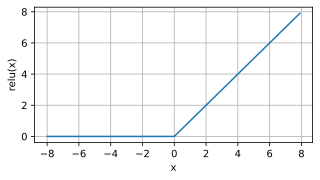

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

Khi đầu vào mang giá trị âm thì đạo hàm của hàm ReLu bằng 0 và khi đầu vào mang giá trị dương thì đạo hàm của hàm ReLu bằng 1. Lưu ý rằng, hàm ReLU không khả vi tại 0. Trong thường hợp này, ta mặc định lấy đạo hàm trái (left-hand-side – LHS) và nói rằng đạo hàm của hàm ReLU tại 0 thì bằng 0. Chỗ này có thể du di được vì đầu vào thông thường không có giá trị chính xác bằng không. Có một ngạn ngữ xưa nói rằng, nếu ta quan tâm nhiều đến điều kiện biên thì có lẽ ta chỉ đang làm toán (*thuần túy*), chứ không phải đang làm kỹ thuật. Và trong trường hợp này, ngạn ngữ đó đúng. Đồ thị đạo hàm của hàm ReLU như hình dưới.

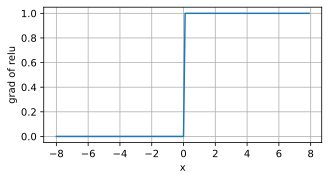

In [3]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

Lưu ý rằng, có nhiều biến thể của hàm ReLU, bao gồm ReLU được tham số hóa (pReLU) của He et al., 2015. Phiên bản này thêm một thành phần tuyến tính vào ReLU, do đó một số thông tin vẫn được giữ lại ngay cả khi đối số là âm.

<center>$pReLU(x)=max(0,x)+αmin(0,x)$</center>
 
Ta sử dụng hàm ReLU bởi vì đạo hàm của nó khá đơn giản: hoặc là chúng biến mất hoặc là chúng cho đối số đi qua. Điều này làm cho việc tối ưu trở nên tốt hơn và giảm thiểu được nhược điểm *tiêu biến gradient* đã từng gây khó khăn trong các phiên bản trước của mạng nơ-ron (sẽ được đề cập lại sau này).

#### 4.1.2.2. Hàm Sigmoid
Hàm sigmoid biến đổi các giá trị đầu vào có miền giá trị thuộc  R  thành các giá trị đầu ra nằm trong khoảng  (0,1) . Vì vậy, hàm sigmoid thường được gọi là hàm ép: nó ép một giá trị đầu vào bất kỳ nằm trong khoảng ( −∞ ,  ∞ ) thành một giá trị đầu ra nằm trong khoảng (0, 1).

<center>$\mathrm{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$</center>

Khi phương pháp học dựa trên gradient trở nên phổ biến, hàm sigmoid là một lựa chọn tất yếu của đơn vị ngưỡng bởi tính liên tục và khả vi của nó. Hàm sigmoid vẫn là hàm kích hoạt được sử dụng rộng rãi ở các đơn vị đầu ra, khi ta muốn biểu diễn kết quả đầu ra như là các xác suất của bài toán phân loại nhị phân (bạn có thể xem sigmoid như một trường hợp đặc biệt của softmax). Tuy nhiên, trong các tầng ẩn, hàm sigmoid hầu hết bị thay thế bằng hàm ReLU vì nó đơn giản hơn và giúp cho việc huấn luyện trở nên dễ dàng hơn. Trong chương “Mạng nơ-ron hồi tiếp” (Section 8.4), chúng tôi sẽ mô tả các mô hình sử dụng đơn vị sigmoid để kiểm soát luồng thông tin theo thời gian.

Dưới đây, ta vẽ đồ thị hàm sigmoid. Cần chú ý rằng, khi đầu vào có giá trị gần bằng 0, hàm sigmoid tiến tới một phép biến đổi tuyến tính.

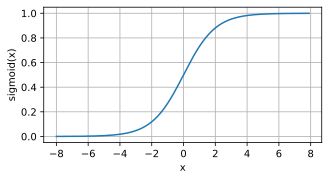

In [4]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

Đạo hàm của hàm sigmoid được tính bởi phương trình sau:

<center>$\frac{d}{dx} \mathrm{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \mathrm{sigmoid}(x)\left(1-\mathrm{sigmoid}(x)\right).$</center>

Đồ thị đạo hàm của hàm sigmoid được vẽ ở dưới. Chú ý rằng khi đầu vào là 0, đạo hàm của hàm sigmoid đạt giá trị lớn nhất là 0.25. Khi đầu vào phân kỳ từ 0 theo một trong hai hướng, đạo hàm sẽ tiến tới 0.

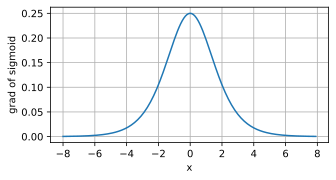

In [5]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

#### 4.1.2.3. Hàm “Tanh”
Tương tự như hàm sigmoid, hàm tanh (Hyperbolic Tangent) cũng ép các biến đầu vào và biến đổi chúng thành các phần tử nằm trong khoảng -1 và 1:

<center>$xt{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$</center>

Chúng ta sẽ vẽ hàm tanh như sau. Chú ý rằng nếu đầu vào có giá trị gần bằng 0, hàm tanh sẽ tiến đến một phép biến đổi tuyến tính. Mặc dù hình dạng của hàm tanh trông khá giống hàm sigmoid, hàm tanh lại thể hiện tính đối xứng tâm qua gốc của hệ trục tọa độ.

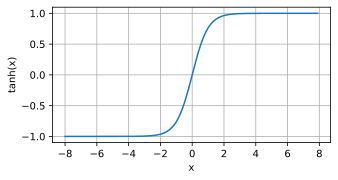

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

Đạo hàm của hàm Tanh là:

<center>$\frac{d}{dx} \mathrm{tanh}(x) = 1 - \mathrm{tanh}^2(x).$</center>
 
Đạo hàm của hàm tanh được vẽ như sau. Khi đầu vào có giá trị gần bằng 0, đạo hàm của hàm tanh tiến tới giá trị lớn nhất là 1. Tương tự như hàm sigmoid, khi đầu vào phân kỳ từ 0 theo bất kỳ hướng nào, đạo hàm của hàm tanh sẽ tiến đến 0.

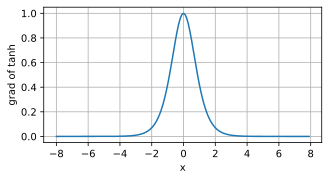

In [7]:
# Clear out previous gradients.
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

Tóm lại, bây giờ chúng ta đã biết cách kết hợp các hàm phi tuyến để xây dựng các kiến trúc mạng nơ-ron đa tầng mạnh mẽ. Một lưu ý bên lề đó là, kiến thức của bạn bây giờ cung cấp cho bạn cách sử dụng một bộ công cụ tương đương với của một người có chuyên môn về học sâu vào những năm 1990. Xét theo một khía cạnh nào đó, bạn còn có lợi thế hơn bất kỳ ai làm việc trong những năm 1990, bởi vì bạn có thể tận dụng triệt để các framework học sâu nguồn mở để xây dựng các mô hình một cách nhanh chóng, chỉ với một vài dòng mã. Trước đây, việc huấn luyện các mạng nơ-ron đòi hỏi các nhà nghiên cứu phải viết đến hàng ngàn dòng mã C và Fortran.

### 4.1.3. Tóm tắt
* Perceptron đa tầng sẽ thêm một hoặc nhiều tầng ẩn được kết nối đầy đủ giữa các tầng đầu ra và các tầng đầu vào nhằm biến đổi đầu ra của tầng ẩn thông qua hàm kích hoạt.
* Các hàm kích hoạt thường được sử dụng bao gồm hàm ReLU, hàm sigmoid, và hàm tanh.

### 4.1.4. Bài tập
1. Tính đạo hàm của hàm kích hoạt tanh và pReLU.
2. Chứng minh rằng một perceptron đa tầng chỉ sử dụng ReLU (hoặc pReLU) sẽ tạo thành một hàm tuyến tính từng đoạn liên tục.
3. Chứng minh rằng  $\mathrm{tanh}(x) + 1 = 2 \mathrm{sigmoid}(2x)$ .
4. Giả sử ta có một perceptron đa tầng mà không có tính phi tuyến giữa các tầng. Cụ thể là, giả sử ta có chiều của đầu vào  d , chiều đầu ra  d  và tầng ẩn có chiều  d/2 . Chứng minh rằng mạng này có ít khả năng biểu diễn hơn một perceptron đơn tầng.
5. Giả sử ta có một hàm phi tuyến tính áp dụng cho từng minibatch mỗi lúc. Việc này sẽ dẫn đến vấn đề gì?

## 4.2. Lập trình Perceptron Đa tầng từ đầu
Chúng ta đã mô tả perceptron đa tầng (MLPs) ở dạng toán học, giờ hãy cùng thử tự lập trình một mạng như vậy xem sao. Để so sánh với kết quả đã đạt được trước đó bằng hồi quy (tuyến tính) softmax (Section 3.6), chúng ta sẽ tiếp tục sử dụng tập dữ liệu phân loại ảnh Fashion-MNIST.

In [8]:
from d2l import torch as d2l
import torch
from torch import nn

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 4.2.1. Khởi tạo Tham số Mô hình
Để bắt đầu, chúng ta sẽ lập trình một mạng MLP chỉ có một tầng ẩn với  $256$  nút ẩn. Lưu ý rằng ta có thể coi cả hai đại lượng này là các siêu tham số và ta nên thiết lập giá trị cho chúng dựa vào chất lượng trên tập kiểm định. Thông thường, chúng ta sẽ chọn độ rộng của các tầng là các lũy thừa bậc  $2$  để giúp việc tính toán hiệu quả hơn do cách mà bộ nhớ được cấp phát và địa chỉ hóa ở phần cứng.

Chúng ta sẽ lại biểu diễn các tham số bằng một vài tensor. Lưu ý rằng với mỗi tầng, ta luôn phải giữ một ma trận trọng số và một vector chứa hệ số điều chỉnh. Và như mọi khi, ta cấp phát bộ nhớ cho gradient (của hàm mất mát) theo các tham số này.

In [9]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

### 4.2.2. Hàm Kích hoạt
Để đảm bảo rằng ta biết mọi thứ hoạt động như thế nào, chúng ta sẽ tự lập trình hàm kích hoạt ReLU bằng cách sử dụng hàm maximum thay vì gọi trực tiếp hàm npx.relu.

In [10]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

### 4.2.3. Mô hình
Vì ta đang bỏ qua mối liên hệ về mặt không gian giữa các điểm ảnh, ta reshape mỗi bức ảnh 2D thành một vector phẳng có độ dài num_inputs. Cuối cùng, ta có được mô hình chỉ với một vài dòng mã nguồn.

In [11]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # Here '@' stands for matrix multiplication
    return (H@W2 + b2)

### 4.2.4. Hàm mất mát
Để đảm bảo tính ổn định số học (và cũng bởi ta đã lập trình hàm softmax từ đầu ở Section 3.6), ta sẽ tận dụng luôn các hàm số đã tích hợp sẵn của API để tính softmax và mất mát entropy chéo. Nhắc lại phần thảo luận của chúng ta trước đó về vấn đề rắc rối này (Section 4.1). Chúng tôi khuyến khích bạn đọc quan tâm hãy thử kiểm tra mã nguồn.

In [12]:
loss = nn.CrossEntropyLoss()

### 4.2.5. Huấn luyện
Thật may, vòng lặp huấn luyện của MLP giống hệt với vòng lặp của hồi quy softmax. Tận dụng gói d2l, ta gọi hàm `train_ch3` (xem Section 3.6), đặt số epoch bằng  $10$  và tốc độ học bằng  $0.5$

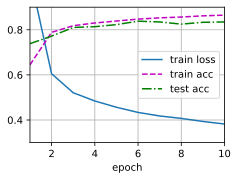

In [13]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

Để đánh giá mô hình sau khi học xong, chúng ta sẽ áp dụng nó vào dữ liệu kiểm tra.

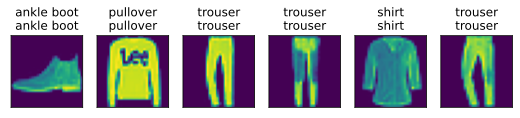

In [14]:
d2l.predict_ch3(net, test_iter)

### 4.2.6. Tóm tắt
Chúng ta đã thấy việc lập trình một MLP đơn giản khá là dễ dàng, ngay cả khi phải làm thủ công. Tuy vậy, với một số lượng tầng lớn, việc này có thể sẽ trở nên rắc rối (ví dụ như đặt tên và theo dõi các tham số của mô hình, v.v.).

### 4.2.7. Bài tập
1. Thay đổi giá trị của siêu tham số `num_hiddens` và quan sát xem nó ảnh hưởng như thế nào tới kết quả. Giữ nguyên các siêu tham số khác, xác định giá trị tốt nhất của siêu tham số này.
2. Thử thêm vào một tầng ẩn và quan sát xem nó ảnh hưởng như thế nào tới kết quả.
3. Việc thay đổi tốc độ học ảnh hưởng như thế nào tới kết quả? Giữ nguyên kiến trúc mô hình và các siêu tham số khác (bao gồm cả số lượng epoch), tốc độ học nào cho kết quả tốt nhất?
4. Kết quả tốt nhất mà bạn đạt được khi tối ưu hóa tất cả các tham số, gồm tốc độ học, số lượng vòng lặp, số lượng tầng ẩn, số lượng các nút ẩn của mỗi tầng là bao nhiêu?
5. Giải thích tại sao việc phải xử lý nhiều siêu tham số lại gây ra nhiều khó khăn hơn.
6. Đâu là chiến lược thông minh nhất bạn có thể nghĩ ra để tìm kiếm giá trị cho nhiều siêu tham số?

## 4.3. Cách lập trình súc tích Perceptron Đa tầng
Như bạn đã có thể đoán trước, ta có thể dựa vào thư viện high API để lập trình MLP một cách súc tích hơn.

In [15]:
from d2l import torch as d2l
import torch
from torch import nn

### 4.3.1. Mô hình
So với việc tự lập trình hồi quy softmax (Section 3.7), khác biệt duy nhất ở đây là ta thêm hai tầng Dense (kết nối đầy đủ), trong khi trước đây ta chỉ có một. Tầng đầu tiên là tầng ẩn, chứa 256 nút ẩn và áp dụng hàm kích hoạt ReLU. Còn tầng thứ hai là tầng đầu ra.

In [16]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

Vòng lặp huấn luyện ở đây giống hệt như lúc ta lập trình hồi quy softmax. Lập trình hướng mô-đun như vậy cho phép ta tách các chi tiết liên quan đến kiến trúc của mô hình ra khỏi các mối bận tâm khác.

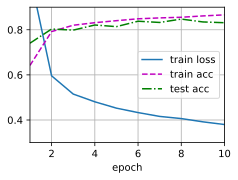

In [17]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 4.3.2. Bài tập
Bằng việc thử thêm số lượng các tầng ẩn khác nhau, bạn hãy xem thiết lập nào cho kết quả tốt nhất (giữ nguyên giá trị các tham số và siêu tham số khác)?
Bằng việc thử thay đổi các hàm kích hoạt khác nhau, bạn hãy chỉ ra hàm nào mang lại kết quả tốt nhất?
Bạn hãy thử các cách khác nhau để khởi tạo trọng số. Phương pháp nào là tốt nhất?